<a href="https://colab.research.google.com/github/iamhero2709/Learning-Projects-Notebook/blob/main/ml_projects/Kmeans_scarcth2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KMEANS FROM SCRATCH **
--- we are going to build kmeans algoritham from scrach and build trhe model and fit on the data we will generate sample data and visulise it

🔢 What is K-Means?
---
K-Means is an unsupervised learning algorithm used for clustering unlabeled data. It groups similar data points into K clusters based on distance from centroids.

NumPy: Used for efficient array operations and distance calculations.

Matplotlib: Used to visualize clusters and centroids.

 Step 1: Generate Synthetic Data
 ---
We generate 300 random data points in 2D space grouped into 3 clusters using make_blobs().

 Step 2: Euclidean Distance Function
 ---
 Why?: This is the basic distance metric used in K-Means. It calculates the straight-line distance between two points in multi-dimensional space.

Step 3: Initialize Random Centroids
--
We randomly pick k samples from the data to serve as the initial centroids.

np.random.permutation ensures randomness without repetition.



Step 4: Assign Data to Nearest Centroid
--
For each point, we calculate the distance to all centroids, then assign it to the closest one.

Step 5: Recompute Centroids
---
--We calculate the mean position of all points in each cluster → this becomes the new centroid.

Edge Case: If a cluster has no points, reinitialize it with a random point.




 Step 6: Check Convergence
 --
 If centroids don’t change significantly, we assume convergence.

np.allclose compares element-wise arrays within a tolerance.

Step 7: Combine into Full K-Means Algorithm
--
This is the main K-Means loop:

1.Assign clusters

2.Recalculate centroids

3.Check convergence

Step 8: Plotting Clusters and Centroids
---
This function helps us visualize the cluster assignment and final centroid positions.

🧠 Why Code This from Scratch?
---
To truly understand how clustering works.

Helps with interview questions and algorithm intuition.

You can customize behavior (distance functions, convergence, init strategy).

Builds strong foundations before using libraries like scikit-learn.

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

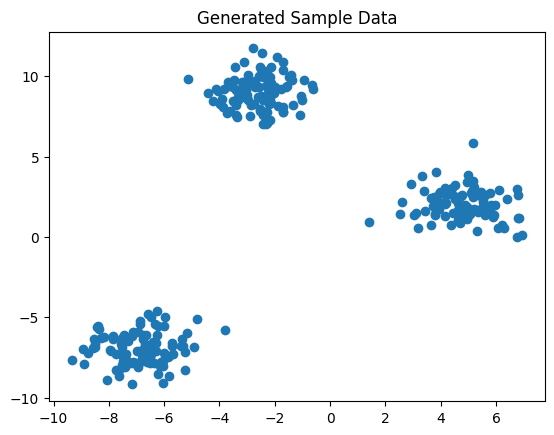

In [5]:
# generating the sample data
X, y= make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Generated Sample Data")
plt.show()

In [6]:
#Define disrtance function (Euclidean )
def Euclidean(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [13]:
# Intailize K random centroids
def intialize_centroids(X,k):
  np.random.seed(42)
  random_idx=np.random.permutation(X.shape[0])
  centroids=X[random_idx[:k]]
  return centroids


In [20]:
# ASSIGN CLUSTERS
def assign_clusters(X, centroids):
    clusters = []
    for point in X:
        distances = [Euclidean(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)


In [21]:
# UPDATE CENTROIDS
def update_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[clusters == i]
        new_centroid = cluster_points.mean(axis=0)
        new_centroids.append(new_centroid)
    return np.array(new_centroids)


In [22]:
# FULL KMEANS LOOP
def kmeans(X, k, max_iters=100):
    centroids = intialize_centroids(X, k)

    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)

        # Check convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, clusters


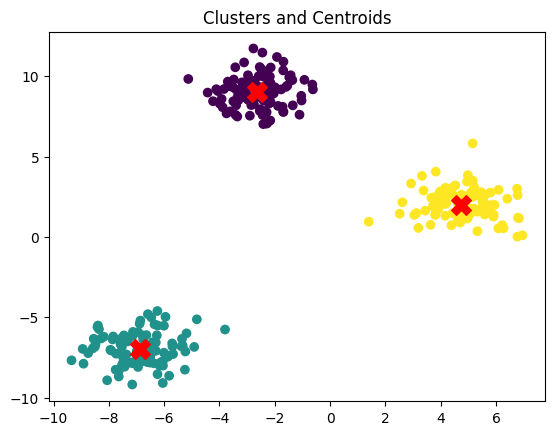

In [23]:
final_centroids, final_clusters = kmeans(X, k=3)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=final_clusters, cmap='viridis')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], color='red', marker='X', s=200)
plt.title("Clusters and Centroids")
plt.show()


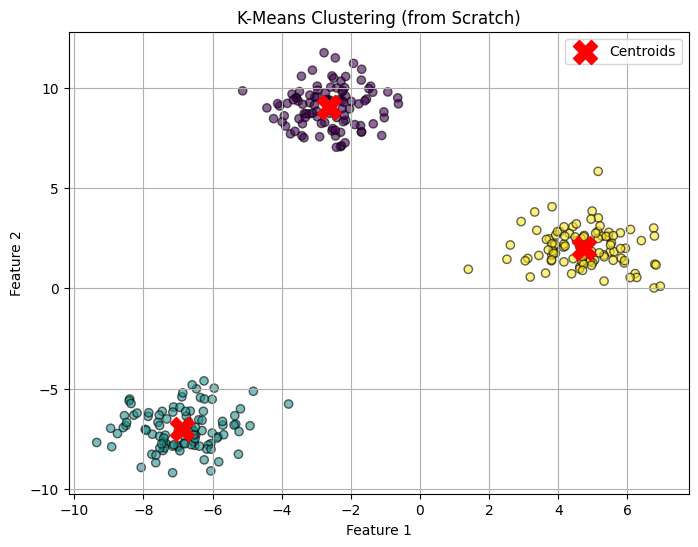

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


def generate_sample_data(n_samples=300, n_features=2, centers=3, random_state=42):
    """Generate synthetic dataset for clustering"""
    X, y_true = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, random_state=random_state)
    return X, y_true


def euclidean_distance(a, b):
    """Calculate Euclidean distance between two points"""
    return np.sqrt(np.sum((a - b) ** 2))


def initialize_centroids(X, k, seed=42):
    """Randomly choose k data points as initial centroids"""
    np.random.seed(seed)
    random_indices = np.random.permutation(len(X))[:k]
    return X[random_indices]


def assign_clusters(X, centroids):
    """Assign each data point to the nearest centroid"""
    clusters = []
    for point in X:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)


def update_centroids(X, clusters, k):
    """Update centroid positions based on mean of points in each cluster"""
    new_centroids = []
    for i in range(k):
        cluster_points = X[clusters == i]
        if len(cluster_points) == 0:
            # If a cluster has no points, reinitialize randomly
            new_centroids.append(X[np.random.randint(0, len(X))])
        else:
            new_centroids.append(cluster_points.mean(axis=0))
    return np.array(new_centroids)


def has_converged(old_centroids, new_centroids):
    """Check if centroids have stopped changing (convergence)"""
    return np.allclose(old_centroids, new_centroids)


def kmeans(X, k, max_iters=100):
    """Full K-Means clustering algorithm"""
    centroids = initialize_centroids(X, k)

    for i in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)

        if has_converged(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, clusters


def plot_clusters(X, clusters, centroids):
    """Visualize the final clusters and centroids"""
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', alpha=0.6, edgecolor='k')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
    plt.title("K-Means Clustering (from Scratch)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()


# 🚀 Run it all together
if __name__ == "__main__":
    X, _ = generate_sample_data(n_samples=300, centers=3)
    k = 3
    centroids, clusters = kmeans(X, k)
    plot_clusters(X, clusters, centroids)
